# Спринт 3. Исследовательский анализ данных

## Постановка задачи:

1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

## Шаг 1. Загружаем dataframe

##### Импортируем датасет с помощью pandas

In [1]:
import pandas as pd #Подключаем pandas
import math as mt

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep = '\t') #Создаем датафрейм из csv

##### Изучаем общую информацию о полученном файле**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание столбцов:**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

##### Видимые проблемы:

Очевидно, что в столбцах ceiling_height, floors_total, is_apartment, living_area, kitchen_area, balcony, locality_name, airports_nearest,  cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition есть пропущенные значения

Так же столбцы is_apartment и floors_total явно имеют неправильный тип (должен быть bool и int). Дата публикации записана в виде строки, что может быть не удобно

##### Построим общую гистограмму для всех столбцов

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

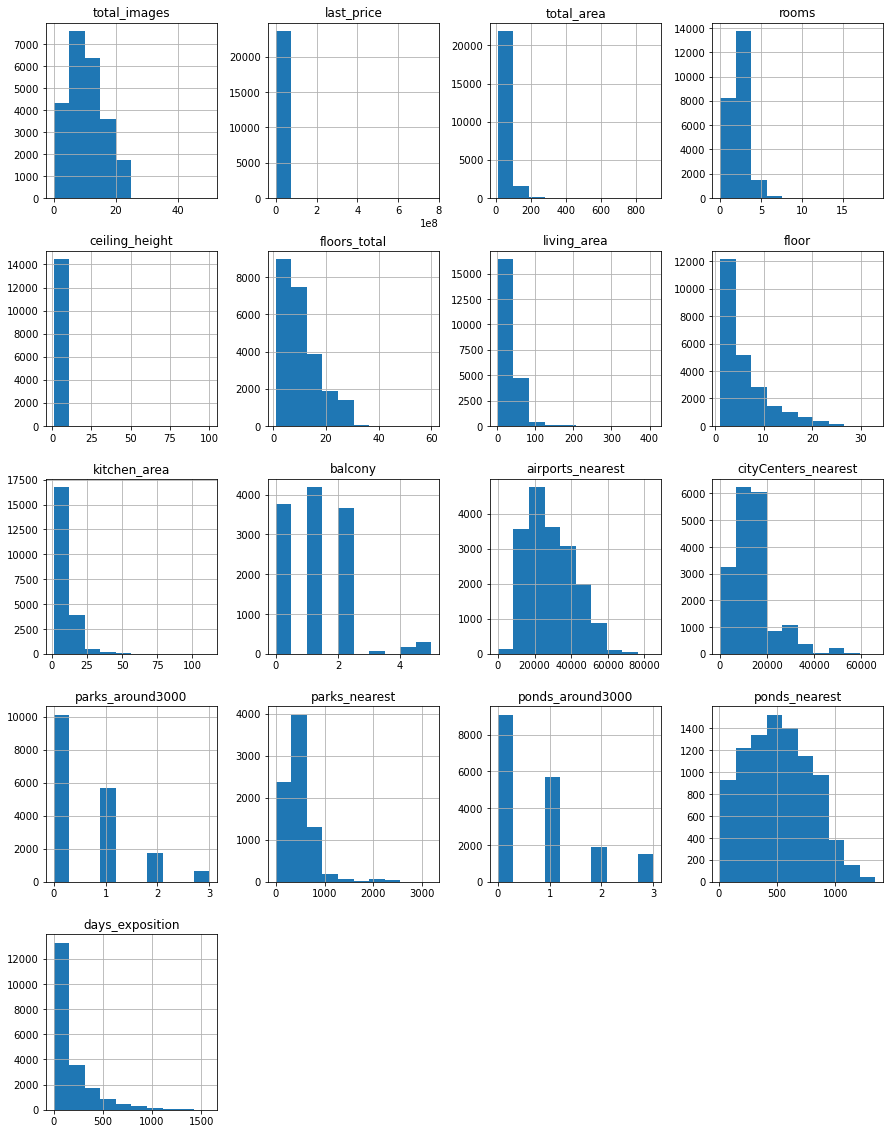

In [5]:
data.hist(figsize= (15, 20))

#### Промежуточные выводы до обработки данных:

## Шаг 2. Предобработка данных

### 2.1. Заполнение NaN

прежде чем что-то делать переименуем столбец cityCenters_nearest в snake_case

In [6]:
data = data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest'})

В рамках предыдущего этапа мы определили предполагаемые столбцы с пропусками. Теперь проверим наше предположение

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.1.1 Заполнение столбцов kitchen_area, living_area

В студиях нет кухни. Для студий можем заполнить NaN нулями. За студии (комнаты) будем считать также 

In [8]:
data.loc[((data['studio'] == True) | (data['rooms'] == 0))& (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [9]:
data.kitchen_area.isna().sum()

2070

208 студий или комнат убрали

Для некоторых значений известна жилплощадь (living area). Получим площадь кухни вычитанием жилплощади из суммарной площади. Для этого напишем отдельную функцию

In [10]:
def calculate_area(data:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:
    i = 0
    while i < data[column3].count():
        if mt.isnan(data.loc[i,column3]) == True:
            if mt.isnan(data.loc[i,column2]) != True:            
                data.loc[i,column3] = data.loc[i,column1] - data.loc[i,column2]
        i += 1
    return data    

In [11]:
data = calculate_area(data, 'total_area', 'living_area', 'kitchen_area') 
data.kitchen_area.isna().sum()

1489

Для 1489 записей значение living_area не задано. Возможна и обратная ситуация (когда есть kitchen_area но нет living_area)

In [12]:
data = calculate_area(data, 'total_area', 'kitchen_area', 'living_area') 
data.living_area.isna().sum()

1489

In [13]:
rooms_median = data.pivot_table(index= 'rooms', values= ['living_area', 'kitchen_area'] , aggfunc='median')

Остальные значения заполним медианными для количества комнат

In [14]:
def median_area(data:pd.DataFrame, rooms_median:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:
    i = 0    
    while i < data[column1].count():
        if mt.isnan(data.loc[i,column1]) == True:            
                data.loc[i,column1] = rooms_median.loc[data.loc[i,column2] , column3]                 
        i += 1
    return data

In [15]:
data = median_area(data, rooms_median, 'kitchen_area', 'rooms', 'living_area')
data.kitchen_area.isna().sum()

0

In [16]:
data = median_area(data, rooms_median, 'living_area', 'rooms', 'kitchen_area')
data.living_area.isna().sum()

0

#### 2.1.2 Столбцы locality_name и balcony

В столбце локаций всего 49 пропусков. По сравнению с общим количеством этим можно принебречь

In [17]:
data = data.dropna(subset = 'locality_name').reset_index(drop= True)

Так же если не указано количество балконов, скорее всего их нет

In [18]:
data['balcony'] = data['balcony'].fillna(0)

In [19]:
data.balcony.isna().sum()

0

#### 2.1.3 Столбец floors

Проверим гипотезу, что если этаж не указан, значит в здании всего один этаж

In [20]:
data[data['floor'] != 1].floor.isna().sum()

0

Гипотеза не подтвердилась. В столбце количества этажей всего 86 пропусков. По сравнению с общим количеством этим можно принебречь

In [21]:
data = data.dropna(subset = 'floors_total').reset_index(drop = True)
data['floors_total'].isna().sum()

0

####  2.1.4 Cтолбец is_appartament

***Гипотеза:*** Скорее всего пропуски в столбце is_apartament означают, что объект недвижимости не является апартаментами.

Для проверки данной гипотезы логично предположить, что практически все апартаменты находятся в Санкт-Петербурге.  
Для всех населенных пунктов кроме Спб сравним количество пропущенных значений в столбце is_appartament и количество записей об объявлениях

In [22]:
not_in_spb = data.query('locality_name != "Санкт-Петербург"').is_apartment

print('Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб:', not_in_spb.isna().sum(),',', len(not_in_spb))     

Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб: 6987 , 7914


In [23]:
data.query('locality_name != "Санкт-Петербург"').is_apartment.count()

927

Всего 927 записей о статусе апартамены/не апартаменты в Ленинградской области !

Для того чтобы точно убедиться, среди данных записей посмотрим количество аппартаментов

In [24]:
not_in_spb = data.query('is_apartment == True' and 'is_apartment.isna() != True' and 'locality_name != "Санкт-Петербург"')
print('Количество аппартаменов в Лен.области:',not_in_spb.is_apartment.sum())

Количество аппартаменов в Лен.области: 11


Всего 11 аппартаментов по всей Ленинградской области. Из этого можно делать вывод, что если в столбце is_appartment стоит NAN, скорее всего объект недвижимости не является аппартаментами. Заполним пропуски значениями False

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.is_apartment.isna().sum()

0

#### 2.1.5. Столбцы parks_around3000 и ponds_around3000

Если есть расстояние до парков и водоёмов, логично предположить что по близости есть хотябы один парк. Поэтому заполним все строчки где есть расстояние до парка и водоема единицами.

In [26]:
data[(data['parks_nearest'].isna() != True) & (data['parks_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [27]:
data[(data['ponds_nearest'].isna() != True) & (data['ponds_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Для всех столбцов где есть расстояние до парка и водоема, количество парков и водоемов уже заполнено.  
Можно предположить, что если парки или водоемы не указаны, их по близости нет

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### 2.1.6 Столбец city_centers_nearest

**Гипотеза**: Скорее всего данные значения пропущены для небольших населенных пунктов и не могут быть заполнены

In [29]:
data[(data['city_centers_nearest'].isna() == True) & (data['locality_name'] == "Санкт-Петербург")].groupby('locality_name').city_centers_nearest.count()

locality_name
Санкт-Петербург    0
Name: city_centers_nearest, dtype: int64

**Вывод: Гипотеза верна. С данным столбцом мы ничего не сделаем**

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### 2.1.7 Столбец ceiling_height

Высоту потолков расчитаем медианное значение по категориям цены и местоположения.  
Для этого категоризируем стоимость квартир.

In [31]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [32]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] < 3e+06:
        data.loc[i, 'last_price_category'] = 'E'
    elif 3e+06 <= data.loc[i, 'last_price'] <= 4e+06:
        data.loc[i, 'last_price_category'] = 'D'
    elif 4e+06 <= data.loc[i, 'last_price'] <= 5e+06:
        data.loc[i, 'last_price_category'] = 'C'
    elif 5e+06 <= data.loc[i, 'last_price'] <= 6.79e+06:
        data.loc[i, 'last_price_category'] = 'B'
    elif data.loc[i, 'last_price']  > 6.79e+06:
        data.loc[i, 'last_price_category'] = 'А' 
    else:
        print(data.loc[i, 'last_price'])
        assert(False)   

По категории стоимости и локации расчитаем медиану высоту потолоков и заполним пропуски для медианными значениями

In [33]:
for i in range(len(data['ceiling_height'])): 
    if mt.isnan(data.loc[i ,'ceiling_height']) == True :
        locality_name = data.loc[i ,"locality_name"]
        last_price_category = data.loc[i ,"last_price_category"]
        data.loc[i ,'ceiling_height'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).ceiling_height.median()

In [34]:
data.ceiling_height.isna().sum()

0

#### 2.1.8 Столбец days_exposition

Скорее всего 3171 объявление имеет пропуски в столбце days_exposition, так как они были закрыты в первый день. Логично данные пропуски заполнить нулями

In [35]:
data['days_exposition'] = data['days_exposition'].fillna(0)

К сожалению, остальные столбцы мы не заполним

**Причина проблемы:** 

Пропуски данных связаны:

1. C человеческим фактором (пользователи не указывают определенные параметры)
2. C работой сайта, который воспринимает неуказанные параметры как NAN

### 2.2. Типы данных

Очевидно, что число этажей, количество балконов и количество дней с даты публикации не может быть дробным. Так же очевидно, что столбец is_apartment может принимать только 2 значения. Переведем данные столбцы в int и bool соответственно

In [36]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

Значения даты публикации хранятся в строках. Лучше перевести их в DateTime

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%dT%H:%M:%S.%f')

Дробным не может быть так же кроличество парков и водоемов

In [38]:
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Посмотрим на результат

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Причина проблемы:**

Некорректные типы данных связаны с ошибками в ПО (ошибки в конвертации/сборе информации на сайте)

### 2.3. Обработка дубликатов

По сути на явные и неявные дубликаты можно проверить только по столбцу локации

In [40]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
data.locality_name.nunique()

364

In [42]:
def delete_settlements (row :str) -> str:
    settlements  = (['посёлок', 'поселок',  'городского', 'типа', 'городской', 'деревня',
     'станции', 'Пансионат', 'садовое', 'товарищество', 'село', 'коттеджный'])
    for settlement in settlements:
        if settlement in row:
            row = row.replace(settlement, '') 
    return row

In [43]:
data.locality_name = data.locality_name.apply(delete_settlements)

In [44]:
data.locality_name.nunique()

325

39 дубликатов убрали 

### 2.4. Обработка выбросов

Взглянем на данные

In [45]:
data.reset_index(drop=True)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.726331,10.675875,33.319006,5.878124,12.117205,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.994361,6.594823,23.307157,4.871485,9.602227,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.000000,2.000000,7.100000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.600000,9.000000,29.700000,4.000000,9.700000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.000000,8.000000,13.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,230.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### 2.4.1 Столбцы ceiling_height

2.50    3515
2.60    3283
2.55    2843
2.56    2283
2.90    2119
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

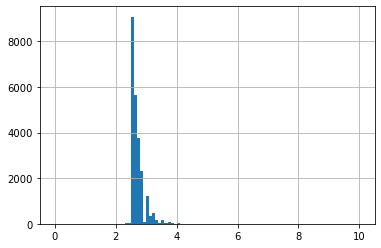

In [46]:
data['ceiling_height'].hist(bins=100, range=(0, 10))
data['ceiling_height'].value_counts()

Абсолютное большинство значений находится в диапазоне 2-4 метра, но минимальная высота потолков 1, а максимальная 100 м ? Здесь явно есть выбросы. Скорее всего здесь ошибка при вводе. Все что выше 10м будем делить на 10, предполагая что это ошибка записи десятичной дроби

In [47]:
def ceiling_height_division(cealing_hight: float) -> float:
        if cealing_hight > 10:
            cealing_hight =cealing_hight / 10
        return cealing_hight 
            
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_division)

Отбросим все потолки меньше 2м. Их всего 5 штук

In [48]:
data = data[data['ceiling_height'] > 2]
data.ceiling_height.describe()

count    23548.000000
mean         2.700278
std          0.250423
min          2.200000
25%          2.550000
50%          2.600000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

#### 2.4.2 Столбец floors_total

Максимальный этаж 33, а всего этажей 60 ? Здесь явно выброс

30

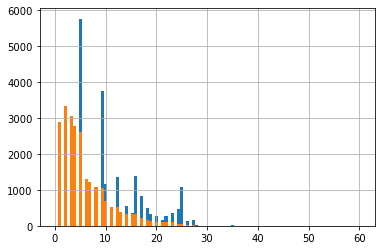

In [49]:
data['floors_total'].hist(bins=100, range=(0, 60))
data['floor'].hist(bins=100, range=(0, 60))
data[data['floors_total'] > 33].floors_total.count()

Всего 30 значений. Ими явно можно пренебречь

In [50]:
data = data[data['floors_total'] < 34]

#### 2.4.3 Столбцы kitchen_area и living_area

Жил площадь 0 - это явно выброс

<AxesSubplot:>

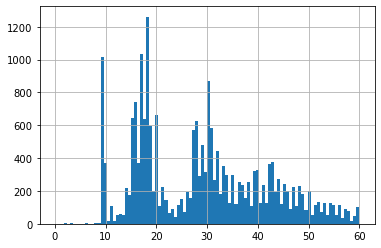

In [51]:
data['living_area'].hist(bins=100, range=(0, 60))

<AxesSubplot:>

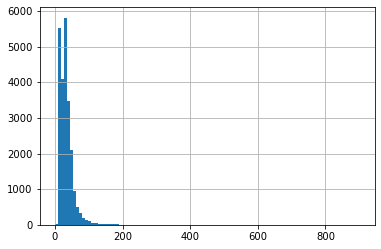

In [52]:
data['living_area'].hist(bins=100, range=(0, 900))

Уберем объявления меньше 9 квадрат и больше 400

In [53]:
data = data[(data['living_area'] > 9) & (data['living_area'] < 400)]
data.living_area.describe()

count    23010.000000
mean        33.772206
std         22.446596
min          9.100000
25%         18.000000
50%         30.000000
75%         42.000000
max        371.000000
Name: living_area, dtype: float64

Аналогично в kitchen_area

уберем значения >50 м2 и от 1 до 4 

177

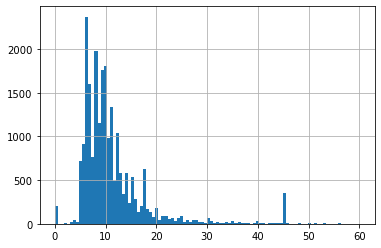

In [54]:
data['kitchen_area'].hist(bins=100, range=(0, 60))
data[data['kitchen_area'] > 50].kitchen_area.count()

<AxesSubplot:>

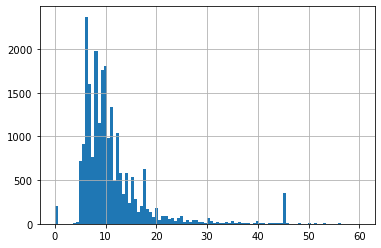

In [55]:
data = data[data['kitchen_area'] < 60]
data = data[(data['kitchen_area'] > 4) | (data['kitchen_area'] == 0)]
data['kitchen_area'].hist(bins=100, range=(0, 60))

#### 2.4.4 Столбец days_exposition

Конечно возможно, что объявление висело 1580, но в основном столько они не висят

<AxesSubplot:>

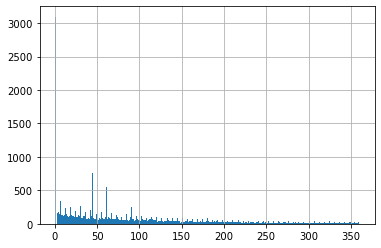

In [56]:
data['days_exposition'].hist(bins=300, range=(0, 360))

Ограничимся одним годом

In [57]:
data[data['days_exposition'] > 360].count()

total_images            3023
last_price              3023
total_area              3023
first_day_exposition    3023
rooms                   3023
ceiling_height          3023
floors_total            3023
living_area             3023
floor                   3023
is_apartment            3023
studio                  3023
open_plan               3023
kitchen_area            3023
balcony                 3023
locality_name           3023
airports_nearest        2358
city_centers_nearest    2361
parks_around3000        3023
parks_nearest           1142
ponds_around3000        3023
ponds_nearest           1284
days_exposition         3023
last_price_category     3023
dtype: int64

In [58]:
data = data[data['days_exposition'] < 360]

Так же очень врядли объекты недвижимости продавались за 1 день. Уберем значения меньше 5 дней

In [94]:
data = data[data['days_exposition'] > 7]

#### 2.4.5 Столбец city_centers_nearest

<AxesSubplot:>

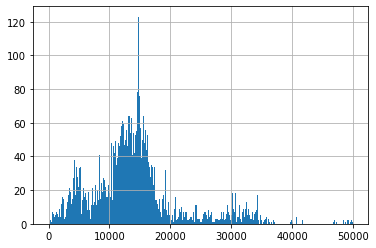

In [60]:
data['city_centers_nearest'].hist(bins=1000, range=(0, 50000))

Выглядит правдоподобно. Уберем значения > 37 км

In [61]:
data = data[data['city_centers_nearest'] < 50000]

#### 2.4.6 Столбец last_price

<AxesSubplot:>

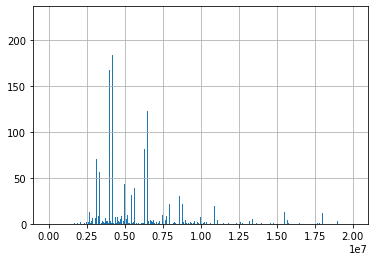

In [62]:
data['last_price'].hist(bins=3000, range=(0,0.2e+08 ))

Скорее всего цены меньше 2 млн являются выбросами

In [63]:
data = data[data['last_price']> 0.2e07]

#### 2.4.7 Столбцы airports_nearest, parks_nearest, pods_nearest	

Очень вряли что дом расположен прямо в аэропорту или в парке или на водоеме. Уберем зачения меньше 6 км и 20м соответственно

In [64]:
data[data['airports_nearest'] < 6000].airports_nearest.count()

1

In [65]:
data[data['parks_nearest'] < 20].parks_nearest.count()

37

In [66]:
data[data['ponds_nearest'] < 20].ponds_nearest.count()

7

In [67]:
data = data[data['airports_nearest']> 6000]
data = data[data['parks_nearest']> 20]
data = data[data['ponds_nearest']> 20]

В остальных столбцах видимых выбросов нет. Значения в пределах логически обоснованых. Сбросим индексы после обработки

In [68]:
data = data.reset_index(drop = True)

## Шаг 3. Добавление столбцов

Добавим цену за м2

In [69]:
data['square_meter_price'] =  data['last_price'] / data['total_area']

Добавим день публикации

In [70]:
def week_day(time) -> int:
    return time.weekday()
data['week_day_exposition'] = data['first_day_exposition'].apply(week_day)

Добавим месяц публикации

In [71]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим год публикации

In [72]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим тип этажа публикации

In [73]:
i = 0
while i < data.floor.count():
    if data.loc[i,'floor'] == 1:
        data.loc[i, 'floor_type'] = 'first'
    elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
        data.loc[i, 'floor_type'] = 'last'
    else:
        data.loc[i, 'floor_type'] = 'else'
    i +=1

Добавим расстояние в км до центра города

In [74]:
data['city_centers_nearest_km'] =  data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].apply(round)

**Результат:**

In [75]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
2931,20,4050000.0,38.00,2019-02-10,1,2.60,4,20.10,3,False,...,3,531.0,23,C,106578.947368,6,2,2019,else,35
2192,8,3700000.0,35.00,2018-09-17,1,2.70,16,18.00,2,False,...,2,240.0,9,D,105714.285714,0,9,2018,else,14
1579,1,4200000.0,56.30,2016-05-13,3,2.40,5,37.00,1,False,...,1,1031.0,293,C,74600.355240,4,5,2016,first,11
2398,1,8346152.0,65.40,2016-05-12,2,3.10,16,33.70,4,False,...,2,454.0,54,А,127617.003058,3,5,2016,else,8
867,20,99000000.0,488.00,2017-04-09,5,2.95,20,216.00,17,False,...,1,368.0,351,А,202868.852459,6,4,2017,else,5
2806,1,10379600.0,67.40,2018-03-15,2,2.90,14,36.00,12,False,...,3,592.0,34,А,154000.000000,3,3,2018,else,6
1817,0,3850000.0,63.80,2015-10-23,3,2.50,9,37.20,2,False,...,1,452.0,284,D,60344.827586,4,10,2015,else,47
2351,5,3150000.0,30.70,2019-03-03,1,2.56,9,24.40,2,False,...,1,860.0,55,D,102605.863192,6,3,2019,else,17
2248,4,14073620.0,75.44,2017-11-28,2,3.04,5,53.84,2,False,...,3,409.0,90,А,186553.817603,1,11,2017,else,9
1637,7,8990000.0,65.90,2017-03-04,2,3.50,4,31.70,4,False,...,3,56.0,275,А,136418.816388,5,3,2017,last,2


## Шаг 4. Исследовательский анализ данных

### 4.1. Гистограммы

#### 4.1.1 Гистограмма общей площади

count    3099.000000
mean       66.983846
std        40.697646
min        19.000000
25%        42.000000
50%        56.850000
75%        78.500000
max       488.000000
Name: total_area, dtype: float64

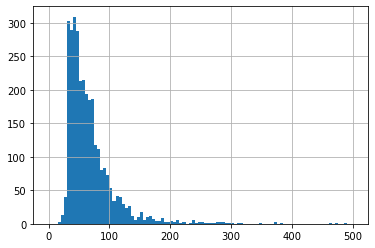

In [76]:
data['total_area'].hist(bins= 100, range= (0,500), grid= True)
data['total_area'].describe()

<AxesSubplot:>

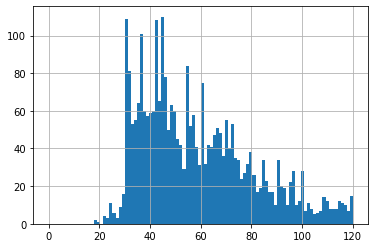

In [77]:
data['total_area'].hist(bins= 100, range= (0,120), grid= True)

**Вывод:** Площадь объектов недвижимости находится в диапазоне от 9 до ~630м2. Большинство объектов недвижимости (межквартильный интервал) имеют площадь от 40 до 71 м2. Средняя площадь - 61 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир площадью 30-60 м2, что объясняется востребованостью таких квартир

#### 4.1.2 Гистограмма жилой площади

count    3099.000000
mean       37.943172
std        26.990794
min         9.100000
25%        19.400000
50%        31.500000
75%        46.725000
max       371.000000
Name: living_area, dtype: float64

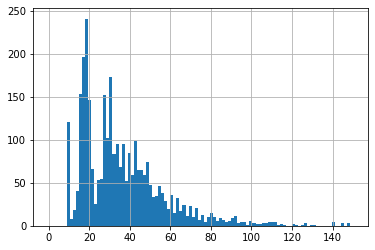

In [78]:
data['living_area'].hist(bins= 100, range= (0,150), grid= True)
data['living_area'].describe()

**Вывод:** Жилая площадь объектов недвижимости находится в диапазоне от 9 до ~140м2. Большое количество около минимального значения объясняется тем, что в комнатах и студиях нет кухни (практически вся площадь - жилая).Большинство объектов недвижимости (межквартильный интервал) имеют жилую площадь от 18 до 42,8 м2. Средняя жилая площадь - 34 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир с жилой площадью 18-38 м2, что объясняется востребованостью таких квартир

#### 4.1.2 Гистограмма площади кухни

10.00    177
7.00     142
8.00     141
6.00     128
9.00     123
        ... 
5.23       1
16.66      1
19.35      1
16.26      1
17.87      1
Name: kitchen_area, Length: 382, dtype: int64

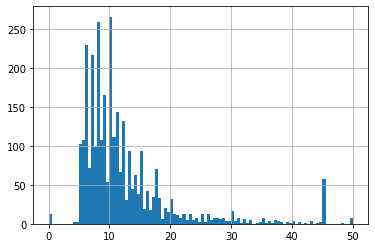

In [79]:
data['kitchen_area'].hist(bins= 100, range= (0,50), grid= True)
data['kitchen_area'].describe()
data['kitchen_area'].value_counts()

**Вывод:** Площадь кухни объектов недвижимости находится в диапазоне от 4 до ~58м2. Большое количество около нуля объясняется тем, что в комнатах и студиях нет кухни.Большинство объектов недвижимости (межквартильный интервал) имеют площадь кухни от 7 до 13 м2. Наблюдается увеличение площади кухни до 45 у квартир элитного сегмента. Средняя площадь кухни - 11,5 м2. В целом, по частоте некоторых значений можно утверждать, что самыми распространенными являются кухни площадью от 6 до 10 м2

#### 4.1.3 Гистограмма цены объекта

count    3.099000e+03
mean     8.792027e+06
std      1.291457e+07
min      2.100000e+06
25%      4.200000e+06
50%      5.850000e+06
75%      8.982500e+06
max      3.300000e+08
Name: last_price, dtype: float64


6500000.0     40
4500000.0     37
4100000.0     36
4200000.0     36
4300000.0     35
              ..
3515000.0      1
20632000.0     1
5880000.0      1
9980833.0      1
6151120.0      1
Name: last_price, Length: 891, dtype: int64

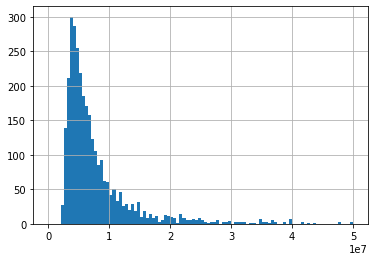

In [80]:
print(data['last_price'].describe())
data['last_price'].hist(bins= 100, range= (1e+04,0.5e+08), grid= True)
data['last_price'].value_counts()

**Вывод:** Цена объектов недвижимости находится в диапазоне от 2 vky  до . Большое количество около нуля объясняется студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат от 1 до 3 можно считать нормальным.

#### 4.1.4 Гистограмма количества комнат

count    3099.000000
mean        2.206841
std         1.161077
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: rooms, dtype: float64


1     974
2     965
3     841
4     201
5      61
6      26
7      13
0      12
8       4
10      1
14      1
Name: rooms, dtype: int64

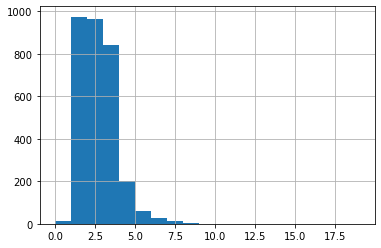

In [81]:
print(data['rooms'].describe())
data['rooms'].hist(bins= 19, range= (0,19), grid= True)
data['rooms'].value_counts()

**Вывод:** Количество комнат объектов недвижимости находится в диапазоне от 0 до 19. Значения около нуля объясняются студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат на участке от 1 до 3 можно считать нормальным.

#### 4.1.5 Гистограмма высоты потолков

count    3099.000000
mean        2.786021
std         0.323452
min         2.300000
25%         2.560000
50%         2.700000
75%         2.900000
max        10.000000
Name: ceiling_height, dtype: float64


2.90     484
2.60     379
2.50     334
2.56     237
2.66     231
        ... 
2.92       1
2.79       1
3.93       1
2.99       1
10.00      1
Name: ceiling_height, Length: 113, dtype: int64

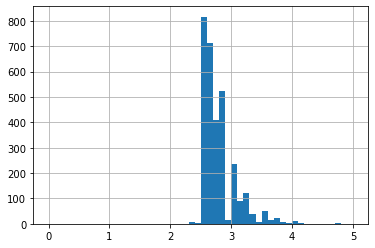

In [82]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins= 50, range= (0,5), grid= True)
data['ceiling_height'].value_counts()

**Вывод:** Высота потолков объектов недвижимости находится в диапазоне от 2 до 10. Большинство объектов недвижимости (межквартильный интервал) имеют высоту потолков от 2.5 до 3.5 В целом распределение комнат на участке 2.5 до 3.5 можно считать нормальным. Большое количество потолков выотой 2,5 и 2,7м объяснятется массовым строительством жил плозади с данной высотой потолков в прошлом 

#### 4.1.6 Гистограмма этажа квартиры

count    3099.000000
mean        5.295257
std         4.068603
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        26.000000
Name: floor, dtype: float64


2     483
4     425
3     419
5     390
1     345
6     189
7     163
8     144
9     123
10     87
11     66
12     52
13     42
14     41
15     32
16     22
17     19
18     15
20     11
22      8
19      7
21      6
23      5
24      3
26      1
25      1
Name: floor, dtype: int64

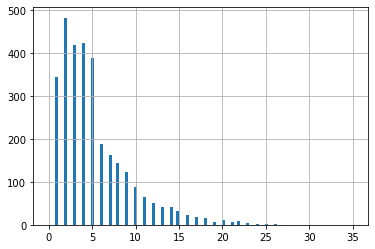

In [83]:
print(data['floor'].describe())
data['floor'].hist(bins= 100, range= (0,35), grid= True)
data['floor'].value_counts()

**Вывод:** Этаж квартиры объектов недвижимости находится в диапазоне от 1 до 32. Большинство объектов недвижимости (межквартильный интервал) находится на этаже от 3 до 8-ого. Самые частые - от 2-ого до 5-ого

#### 4.1.7 Гистограмма типа этажа квартиры

count     3099
unique       3
top       else
freq      2292
Name: floor_type, dtype: object


else     2292
last      462
first     345
Name: floor_type, dtype: int64

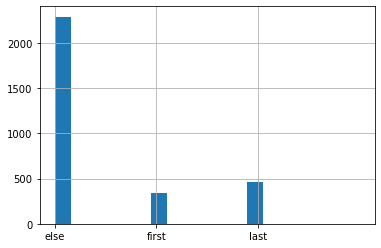

In [84]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True)
data['floor_type'].value_counts()

**Вывод:** Естестественно большое всего объявлений ни с первого и последнего этажа

#### 4.1.8 Гистограмма общего количества этажей в доме

count    3099.000000
mean        9.434334
std         5.407219
min         2.000000
25%         5.000000
50%         9.000000
75%        12.000000
max        28.000000
Name: floors_total, dtype: float64


5     742
9     397
12    231
6     227
4     220
10    217
16    174
7     130
3     104
17     96
14     83
8      82
13     60
25     57
20     49
15     42
18     38
24     34
11     21
19     21
22     17
2      16
23     16
21     12
26     10
28      2
27      1
Name: floors_total, dtype: int64

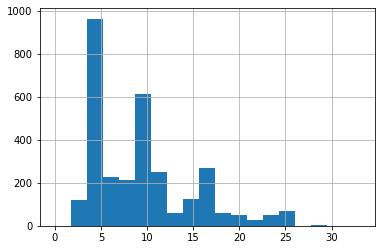

In [85]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins= 19, range= (0,33), grid= True)
data['floors_total'].value_counts()

**Вывод:** Общее количество этажей объектов недвижимости находится в диапазоне от 1 до 33. Большинство объектов недвижимости (межквартильный интервал) имеет количество этажей от 5 до 16-ого. Самые частые - 5-ти, 9-ти, 6-ти и 12-ти этажки

#### 4.1.9 Гистограмма расстояния до центра города в метрах

count     3099.000000
mean     12455.570184
std       8900.659016
min        208.000000
25%       6031.000000
50%      11544.000000
75%      14949.000000
max      49984.000000
Name: city_centers_nearest, dtype: float64


8460.0     27
8434.0     17
10720.0    17
7442.0     14
8370.0     13
           ..
3277.0      1
8427.0      1
2231.0      1
9748.0      1
11602.0     1
Name: city_centers_nearest, Length: 1932, dtype: int64

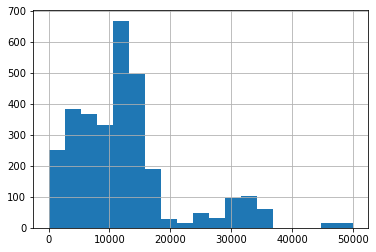

In [86]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins= 19, range= (0,50000), grid= True)
data['city_centers_nearest'].value_counts()

**Вывод:** Расстояния до центра города объектов недвижимости находится в диапазоне от 181м до 50км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от центра города от 9,6 км до 16 км. Распределение на данном интервале можно считать нормальным.

#### 4.1.10 Гистограмма расстояния до расстояние до ближайшего аэропорта

count     3099.000000
mean     27819.377218
std      11451.673243
min       8255.000000
25%      19639.500000
50%      26398.000000
75%      35124.000000
max      68258.000000
Name: airports_nearest, dtype: float64


37434.0    27
37407.0    17
39946.0    17
27102.0    14
47303.0    14
           ..
32670.0     1
25490.0     1
9522.0      1
29453.0     1
11751.0     1
Name: airports_nearest, Length: 1945, dtype: int64

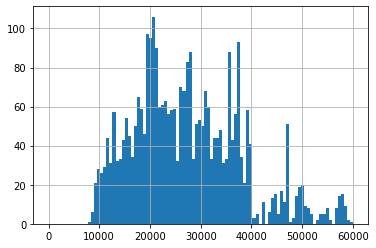

In [87]:
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins= 100, range= (0,60000), grid= True)
data['airports_nearest'].value_counts()

**Вывод:** От аэропорта до объектов недвижимости находится в диапазоне от 9 до 68км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от аэропорта до объекта недвижимости от 19,6 км до 35 км. 

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего парка

count    3099.000000
mean      509.493062
std       387.374491
min        21.000000
25%       288.000000
50%       442.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64


441.0     32
456.0     23
164.0     19
392.0     18
2102.0    17
          ..
913.0      1
1942.0     1
961.0      1
204.0      1
140.0      1
Name: parks_nearest, Length: 806, dtype: int64

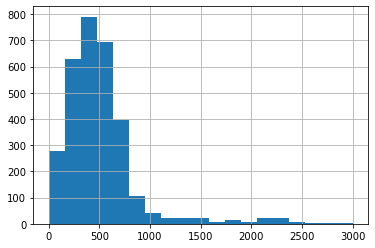

In [88]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins= 19, range= (0,3000), grid= True)
data['parks_nearest'].value_counts()

**Вывод:** От ближайшего парка до объектов недвижимости находится в диапазоне от 21м до 3км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от парка до объекта недвижимости от 300 м до 600 м. Такие значения объясняются тем что скорее всего, если до парка больше 1,5 км - считается что парка по близости нет

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего водоема

count    3099.000000
mean      503.795741
std       273.701760
min        22.000000
25%       283.000000
50%       478.000000
75%       715.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


427.0    28
454.0    23
473.0    17
802.0    17
303.0    17
         ..
493.0     1
828.0     1
57.0      1
42.0      1
519.0     1
Name: ponds_nearest, Length: 892, dtype: int64

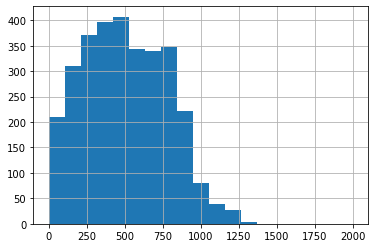

In [89]:
print(data['ponds_nearest'].describe())
data['ponds_nearest'].hist(bins= 19, range= (0,2000), grid= True)
data['ponds_nearest'].value_counts()

**Вывод:** От ближайшего водоема до объектов недвижимости находится в диапазоне от 22м до 1,4 км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от водоема до объекта недвижимости от 276 м до 712 м. Такие значения объясняются тем что скорее всего, если до водоема больше 1,25 км - считается что водоема по близости нет

### 4.2. Анализ

### 4.2.1 Как быстро продавались квартиры ?

mean      111.276806
median     89.000000
Name: days_exposition, dtype: float64

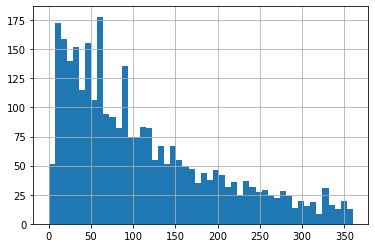

In [95]:
data.days_exposition.hist(bins= 50, range= (0,360), grid= True)
data.days_exposition.agg({'mean', 'median'})

In [91]:
data.days_exposition.describe()

count    3099.000000
mean      108.932236
std        88.785598
min         4.000000
25%        38.000000
50%        85.000000
75%       160.500000
max       359.000000
Name: days_exposition, dtype: float64

**Вывод:** Не

### 4.2.2 Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод